# Python 3: Data cleaning and visualization

So you have learned how to import data, clean it up and save as a csv. Time to get our hands dirty and start digging deep

## Starting out

In  this class we're going to learn how to:
* Identify and clean up messy data data
* Merge different data sets together
* Create graphs and charts to visualise our work

## Our Data

Today we're going to investigate FEC Campaign Finance Data from https://www.fec.gov/data/browse-data/?tab=bulk-data 

We're going to be cleaning and examining two data sets donations declared by campaign committees between 2015-2016 and 2017-2018. 

The file has one record per House and Senate campaign committee and shows information about the candidate, total receipts, transfers received from authorized committees, total disbursements, transfers given to authorized committees, cash-on-hand totals, loans and debts, and other financial summary information

We'll be using https://www.fec.gov/campaign-finance-data/current-campaigns-house-and-senate-file-description/ as our data dictionary



### Loading Libraries and reading in data sets. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import bokeh as bk
import datetime

%matplotlib inline



We're going to read in our two data sets below and take a look at what we have

In [2]:
df18 = pd.read_csv('/Users/karrie/Desktop/2019/NICAR/w18.csv')
df18.head(10)

,CAND_ID,CAND_SURNAME,CAND_FIRSTNAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
0,H8AK00132,SHEIN,DIMITRI,C,1,DEM,209916.04,0.00,209502.35,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,12/31/2018,0.00,0.0
1,H6AK00045,YOUNG,DONALD E,I,2,REP,1234680.31,0.00,1387687.05,0.0,...,NaN,NaN,NaN,NaN,NaN,559861.90,0.00,12/31/2018,2700.00,500.0
2,H8AK01031,NELSON,THOMAS JOHN,C,2,REP,9288.48,0.00,8821.97,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,12/31/2018,600.00,0.0
3,H8AK00140,GALVIN,ALYSE,C,3,IND,1949643.68,154.70,1943398.59,0.0,...,NaN,NaN,NaN,NaN,NaN,114833.97,0.00,12/31/2018,8166.36,0.0
4,H8AL01066,KENNEDY,ROBERT JR.,C,1,DEM,166845.21,0.00,166845.21,0.0,...,NaN,NaN,NaN,NaN,NaN,7750.00,0.00,12/31/2018,0.00,0.0
5,H8AL01082,MCCONNELL,LIZZETTA HILL,C,1,DEM,5127.00,0.00,6021.00,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,06/30/2018,0.00,0.0
6,H4AL01123,BYRNE,BRADLEY ROBERTS,I,2,REP,1463187.12,63923.25,834780.43,0.0,...,NaN,NaN,NaN,NaN,NaN,1054650.00,663.98,12/31/2018,3050.00,0.0
7,H8AL02163,WILLIAMS,AUDRI SCOTT 1955,C,1,DEM,35365.02,0.00,35210.22,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,06/30/2018,0.00,0.0
8,H8AL02197,ISNER,TABITHA KAY,C,1,DEM,524941.35,0.00,524941.35,0.0,...,NaN,NaN,NaN,NaN,NaN,8605.00,0.00,12/31/2018,4796.05,1000.0
9,H0AL02087,ROBY,MARTHA,I,2,REP,2573681.12,85734.19,2277448.83,0.0,...,NaN,NaN,NaN,NaN,NaN,1672691.24,7000.00,12/31/2018,6674.00,2000.0


In [3]:
df18.shape

(2673, 31)

First thing we need to do is to check the object type for each column 

In [4]:
df18.dtypes

CAND_ID                    object
CAND_SURNAME               object
CAND_FIRSTNAME             object
CAND_ICI                   object
PTY_CD                      int64
CAND_PTY_AFFILIATION       object
TTL_RECEIPTS              float64
TRANS_FROM_AUTH           float64
TTL_DISB                  float64
TRANS_TO_AUTH             float64
COH_BOP                   float64
COH_COP                   float64
CAND_CONTRIB              float64
CAND_LOANS                float64
OTHER_LOANS               float64
CAND_LOAN_REPAY           float64
OTHER_LOAN_REPAY          float64
DEBTS_OWED_BY             float64
TTL_INDIV_CONTRIB         float64
CAND_OFFICE_ST             object
CAND_OFFICE_DISTRICT        int64
SPEC_ELECTION             float64
PRIM_ELECTION             float64
RUN_ELECTION              float64
GEN_ELECTION              float64
GEN_ELECTION_PRECENT      float64
OTHER_POL_CMTE_CONTRIB    float64
POL_PTY_CONTRIB           float64
CVG_END_DT                 object
INDIV_REFUNDS 

In [5]:
df16 = pd.read_csv('/Users/karrie/Desktop/2019/NICAR/w16.csv')
df16.head(10)

,CAND_ID,CAND_SURNAME,CAND_FIRSTNAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
0,H6AK00045,YOUNG,DONALD E,I,2,REP,1103561.86,0.0,1322055.12,0.0,...,NaN,NaN,NaN,NaN,NaN,459603.99,0.0,12/31/2016,2250.00,3000.00
1,H6AK00235,LINDBECK,STEVE,NaN,1,DEM,1102309.77,0.0,1098098.09,0.0,...,NaN,NaN,NaN,NaN,NaN,67074.61,5000.0,12/31/2016,884.01,0.00
2,H4AL01123,BYRNE,BRADLEY ROBERTS,I,2,REP,1367469.77,33152.0,1172750.28,0.0,...,NaN,NaN,NaN,NaN,NaN,843200.00,0.0,12/31/2016,1100.00,0.00
3,H6AL01060,YOUNG JR,LARRY DEAN,C,2,REP,178766.88,0.0,178474.16,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,04/14/2016,0.00,0.00
4,H6AL02167,MATHIS,NATHAN,C,1,DEM,36844.00,0.0,36844.00,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,11/16/2016,0.00,0.00
5,H0AL02087,ROBY,MARTHA,I,2,REP,1404260.12,0.0,1850535.64,0.0,...,NaN,NaN,NaN,NaN,NaN,828775.00,0.0,12/31/2016,17550.00,4283.03
6,H6AL02142,GERRITSON,REBECCA (BECKY),C,2,REP,206908.19,0.0,206908.19,0.0,...,NaN,NaN,NaN,NaN,NaN,11500.00,0.0,09/30/2016,1845.00,0.00
7,H6AL02159,ROGERS,ROBERT L,C,2,REP,25382.00,0.0,32492.00,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,04/15/2016,0.00,0.00
8,H4AL03061,SMITH,JESSE TREMAIN,C,1,DEM,9810.00,0.0,7348.00,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,12/31/2016,0.00,0.00
9,H2AL03032,ROGERS,MICHAEL DENNIS,I,2,REP,1139022.37,0.0,1071289.42,167500.0,...,NaN,NaN,NaN,NaN,NaN,660800.00,14850.0,12/31/2016,1000.00,200.00


In [6]:
df16.shape

(1898, 31)

In [7]:
df16.dtypes

CAND_ID                    object
CAND_SURNAME               object
CAND_FIRSTNAME             object
CAND_ICI                   object
PTY_CD                      int64
CAND_PTY_AFFILIATION       object
TTL_RECEIPTS              float64
TRANS_FROM_AUTH           float64
TTL_DISB                  float64
TRANS_TO_AUTH             float64
COH_BOP                   float64
COH_COP                   float64
CAND_CONTRIB              float64
CAND_LOANS                float64
OTHER_LOANS               float64
CAND_LOAN_REPAY           float64
OTHER_LOAN_REPAY          float64
DEBTS_OWED_BY             float64
TTL_INDIV_CONTRIB         float64
CAND_OFFICE_ST             object
CAND_OFFICE_DISTRICT      float64
SPEC_ELECTION             float64
PRIM_ELECTION             float64
RUN_ELECTION              float64
GEN_ELECTION              float64
GEN_ELECTION_PRECENT      float64
OTHER_POL_CMTE_CONTRIB    float64
POL_PTY_CONTRIB           float64
CVG_END_DT                 object
INDIV_REFUNDS 

### Concatenating data frames

In [8]:
frames = [df18, df16]
result = pd.concat(frames, sort=False)

In [9]:
result.head()

,CAND_ID,CAND_SURNAME,CAND_FIRSTNAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
0,H8AK00132,SHEIN,DIMITRI,C,1,DEM,209916.04,0.0,209502.35,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,12/31/2018,0.00,0.0
1,H6AK00045,YOUNG,DONALD E,I,2,REP,1234680.31,0.0,1387687.05,0.0,...,NaN,NaN,NaN,NaN,NaN,559861.90,0.0,12/31/2018,2700.00,500.0
2,H8AK01031,NELSON,THOMAS JOHN,C,2,REP,9288.48,0.0,8821.97,0.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,12/31/2018,600.00,0.0
3,H8AK00140,GALVIN,ALYSE,C,3,IND,1949643.68,154.7,1943398.59,0.0,...,NaN,NaN,NaN,NaN,NaN,114833.97,0.0,12/31/2018,8166.36,0.0
4,H8AL01066,KENNEDY,ROBERT JR.,C,1,DEM,166845.21,0.0,166845.21,0.0,...,NaN,NaN,NaN,NaN,NaN,7750.00,0.0,12/31/2018,0.00,0.0


In [10]:
result.shape

(4571, 31)

In [11]:
result.dtypes

CAND_ID                    object
CAND_SURNAME               object
CAND_FIRSTNAME             object
CAND_ICI                   object
PTY_CD                      int64
CAND_PTY_AFFILIATION       object
TTL_RECEIPTS              float64
TRANS_FROM_AUTH           float64
TTL_DISB                  float64
TRANS_TO_AUTH             float64
COH_BOP                   float64
COH_COP                   float64
CAND_CONTRIB              float64
CAND_LOANS                float64
OTHER_LOANS               float64
CAND_LOAN_REPAY           float64
OTHER_LOAN_REPAY          float64
DEBTS_OWED_BY             float64
TTL_INDIV_CONTRIB         float64
CAND_OFFICE_ST             object
CAND_OFFICE_DISTRICT      float64
SPEC_ELECTION             float64
PRIM_ELECTION             float64
RUN_ELECTION              float64
GEN_ELECTION              float64
GEN_ELECTION_PRECENT      float64
OTHER_POL_CMTE_CONTRIB    float64
POL_PTY_CONTRIB           float64
CVG_END_DT                 object
INDIV_REFUNDS 

In [12]:
result.describe(include='all')


,CAND_ID,CAND_SURNAME,CAND_FIRSTNAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
count,4571,4571,4571,4504,4571.000000,4568,4.571000e+03,4.571000e+03,4.571000e+03,4.571000e+03,...,0.0,0.0,0.0,0.0,0.0,4.571000e+03,4571.000000,4571,4.571000e+03,4.571000e+03
unique,3898,2853,2821,3,NaN,32,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,474,NaN,NaN
top,H0GA07125,SMITH,JOHN,C,NaN,DEM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2018,NaN,NaN
freq,2,32,46,2249,NaN,2110,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1529,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.644717,NaN,1.379350e+06,1.224532e+05,1.357066e+06,8.502578e+03,...,NaN,NaN,NaN,NaN,NaN,2.122934e+05,1434.203500,NaN,2.145265e+04,2.757971e+03
std,NaN,NaN,NaN,NaN,0.664679,NaN,1.138222e+07,3.161103e+06,1.129396e+07,9.404583e+04,...,NaN,NaN,NaN,NaN,NaN,4.670380e+05,9844.390678,NaN,1.688392e+05,2.617095e+04
min,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000e+00,0.000000e+00,-1.268564e+04,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,-3.544889e+05,-2.000000e+03
25%,NaN,NaN,NaN,NaN,1.000000,NaN,1.533307e+04,0.000000e+00,1.512188e+04,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,2.000000,NaN,1.211430e+05,0.000000e+00,1.203657e+05,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,5.000000e+02,0.000000,NaN,5.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,NaN,2.000000,NaN,9.968002e+05,0.000000e+00,9.196386e+05,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,1.849632e+05,0.000000,NaN,6.067000e+03,0.000000e+00


### Cleaning data

We are going to clean up our data so we can perform a bit of analysis and create some graphs. 

* Drop unneccessary columns from our data frame
* Convert a string to a python datetime object and create a new year column
* Convert the 'TTL_RECEIPTS' column from float to integer data type

We have a lot of columns, so we should drop some, also we should create a year column so we can look at trends over time. 



In [13]:
del result['SPEC_ELECTION']
del result['PRIM_ELECTION']
del result['RUN_ELECTION']
del result['GEN_ELECTION']
del result['GEN_ELECTION_PRECENT']


In [14]:
result.shape


(4571, 26)

Now we need to convert CVG_END_DT to a datetime object

In [15]:
pd.to_datetime(result['CVG_END_DT'])

0      2018-12-31
1      2018-12-31
2      2018-12-31
3      2018-12-31
4      2018-12-31
5      2018-06-30
6      2018-12-31
7      2018-06-30
8      2018-12-31
9      2018-12-31
10     2018-12-31
11     2018-05-16
12     2018-06-30
13     2018-09-30
14     2018-12-31
15     2018-12-31
16     2018-12-31
17     2018-09-30
18     2018-12-31
19     2018-12-31
20     2018-03-08
21     2018-09-30
22     2018-09-30
23     2018-12-31
24     2018-12-31
25     2018-05-15
26     2018-03-31
27     2018-12-31
28     2018-11-26
29     2018-12-31
          ...    
1868   2016-06-30
1869   2016-12-08
1870   2016-12-31
1871   2016-12-31
1872   2016-12-31
1873   2016-12-31
1874   2016-12-31
1875   2016-12-31
1876   2016-12-31
1877   2016-09-30
1878   2016-06-30
1879   2016-12-31
1880   2016-12-31
1881   2016-11-08
1882   2016-12-13
1883   2016-12-31
1884   2016-07-12
1885   2016-12-31
1886   2016-12-31
1887   2016-12-31
1888   2016-12-31
1889   2016-12-08
1890   2016-12-31
1891   2016-09-09
1892   201

In [16]:
result.dtypes

CAND_ID                    object
CAND_SURNAME               object
CAND_FIRSTNAME             object
CAND_ICI                   object
PTY_CD                      int64
CAND_PTY_AFFILIATION       object
TTL_RECEIPTS              float64
TRANS_FROM_AUTH           float64
TTL_DISB                  float64
TRANS_TO_AUTH             float64
COH_BOP                   float64
COH_COP                   float64
CAND_CONTRIB              float64
CAND_LOANS                float64
OTHER_LOANS               float64
CAND_LOAN_REPAY           float64
OTHER_LOAN_REPAY          float64
DEBTS_OWED_BY             float64
TTL_INDIV_CONTRIB         float64
CAND_OFFICE_ST             object
CAND_OFFICE_DISTRICT      float64
OTHER_POL_CMTE_CONTRIB    float64
POL_PTY_CONTRIB           float64
CVG_END_DT                 object
INDIV_REFUNDS             float64
CMTE_REFUNDS              float64
dtype: object

In [17]:
result['YEAR'] = pd.DatetimeIndex(result['CVG_END_DT']).year

In [18]:
result.columns

Index(['CAND_ID', 'CAND_SURNAME', 'CAND_FIRSTNAME', 'CAND_ICI', 'PTY_CD',
       'CAND_PTY_AFFILIATION', 'TTL_RECEIPTS ', 'TRANS_FROM_AUTH', 'TTL_DISB',
       'TRANS_TO_AUTH', 'COH_BOP', 'COH_COP', 'CAND_CONTRIB', 'CAND_LOANS',
       'OTHER_LOANS', 'CAND_LOAN_REPAY', 'OTHER_LOAN_REPAY', 'DEBTS_OWED_BY',
       'TTL_INDIV_CONTRIB', 'CAND_OFFICE_ST', 'CAND_OFFICE_DISTRICT',
       'OTHER_POL_CMTE_CONTRIB', 'POL_PTY_CONTRIB', 'CVG_END_DT',
       'INDIV_REFUNDS', 'CMTE_REFUNDS', 'YEAR'],
      dtype='object')

In [19]:
result.head()

,CAND_ID,CAND_SURNAME,CAND_FIRSTNAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,...,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,YEAR
0,H8AK00132,SHEIN,DIMITRI,C,1,DEM,209916.04,0.0,209502.35,0.0,...,367.52,58188.98,AK,0.0,0.00,0.0,12/31/2018,0.00,0.0,2018
1,H6AK00045,YOUNG,DONALD E,I,2,REP,1234680.31,0.0,1387687.05,0.0,...,0.00,670374.33,AK,0.0,559861.90,0.0,12/31/2018,2700.00,500.0,2018
2,H8AK01031,NELSON,THOMAS JOHN,C,2,REP,9288.48,0.0,8821.97,0.0,...,0.00,7100.05,AK,0.0,0.00,0.0,12/31/2018,600.00,0.0,2018
3,H8AK00140,GALVIN,ALYSE,C,3,IND,1949643.68,154.7,1943398.59,0.0,...,0.00,1809591.38,AK,0.0,114833.97,0.0,12/31/2018,8166.36,0.0,2018
4,H8AL01066,KENNEDY,ROBERT JR.,C,1,DEM,166845.21,0.0,166845.21,0.0,...,0.00,39095.21,AL,1.0,7750.00,0.0,12/31/2018,0.00,0.0,2018


Now we're going to get to work on 'TTL_RECEIPTS', let's give it an easier name to type to start off. 

In [20]:
result = result.rename(columns={'TTL_RECEIPTS': 'AMOUNT'})

In [21]:
result.head()

,CAND_ID,CAND_SURNAME,CAND_FIRSTNAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,...,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,YEAR
0,H8AK00132,SHEIN,DIMITRI,C,1,DEM,209916.04,0.0,209502.35,0.0,...,367.52,58188.98,AK,0.0,0.00,0.0,12/31/2018,0.00,0.0,2018
1,H6AK00045,YOUNG,DONALD E,I,2,REP,1234680.31,0.0,1387687.05,0.0,...,0.00,670374.33,AK,0.0,559861.90,0.0,12/31/2018,2700.00,500.0,2018
2,H8AK01031,NELSON,THOMAS JOHN,C,2,REP,9288.48,0.0,8821.97,0.0,...,0.00,7100.05,AK,0.0,0.00,0.0,12/31/2018,600.00,0.0,2018
3,H8AK00140,GALVIN,ALYSE,C,3,IND,1949643.68,154.7,1943398.59,0.0,...,0.00,1809591.38,AK,0.0,114833.97,0.0,12/31/2018,8166.36,0.0,2018
4,H8AL01066,KENNEDY,ROBERT JR.,C,1,DEM,166845.21,0.0,166845.21,0.0,...,0.00,39095.21,AL,1.0,7750.00,0.0,12/31/2018,0.00,0.0,2018


In [22]:
result.columns

Index(['CAND_ID', 'CAND_SURNAME', 'CAND_FIRSTNAME', 'CAND_ICI', 'PTY_CD',
       'CAND_PTY_AFFILIATION', 'TTL_RECEIPTS ', 'TRANS_FROM_AUTH', 'TTL_DISB',
       'TRANS_TO_AUTH', 'COH_BOP', 'COH_COP', 'CAND_CONTRIB', 'CAND_LOANS',
       'OTHER_LOANS', 'CAND_LOAN_REPAY', 'OTHER_LOAN_REPAY', 'DEBTS_OWED_BY',
       'TTL_INDIV_CONTRIB', 'CAND_OFFICE_ST', 'CAND_OFFICE_DISTRICT',
       'OTHER_POL_CMTE_CONTRIB', 'POL_PTY_CONTRIB', 'CVG_END_DT',
       'INDIV_REFUNDS', 'CMTE_REFUNDS', 'YEAR'],
      dtype='object')

In [23]:
result = result.rename(columns={'TTL_RECEIPTS ': 'AMOUNT'})

In [24]:
result.head()

,CAND_ID,CAND_SURNAME,CAND_FIRSTNAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,AMOUNT,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,...,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,YEAR
0,H8AK00132,SHEIN,DIMITRI,C,1,DEM,209916.04,0.0,209502.35,0.0,...,367.52,58188.98,AK,0.0,0.00,0.0,12/31/2018,0.00,0.0,2018
1,H6AK00045,YOUNG,DONALD E,I,2,REP,1234680.31,0.0,1387687.05,0.0,...,0.00,670374.33,AK,0.0,559861.90,0.0,12/31/2018,2700.00,500.0,2018
2,H8AK01031,NELSON,THOMAS JOHN,C,2,REP,9288.48,0.0,8821.97,0.0,...,0.00,7100.05,AK,0.0,0.00,0.0,12/31/2018,600.00,0.0,2018
3,H8AK00140,GALVIN,ALYSE,C,3,IND,1949643.68,154.7,1943398.59,0.0,...,0.00,1809591.38,AK,0.0,114833.97,0.0,12/31/2018,8166.36,0.0,2018
4,H8AL01066,KENNEDY,ROBERT JR.,C,1,DEM,166845.21,0.0,166845.21,0.0,...,0.00,39095.21,AL,1.0,7750.00,0.0,12/31/2018,0.00,0.0,2018


In [25]:
result.dtypes

CAND_ID                    object
CAND_SURNAME               object
CAND_FIRSTNAME             object
CAND_ICI                   object
PTY_CD                      int64
CAND_PTY_AFFILIATION       object
AMOUNT                    float64
TRANS_FROM_AUTH           float64
TTL_DISB                  float64
TRANS_TO_AUTH             float64
COH_BOP                   float64
COH_COP                   float64
CAND_CONTRIB              float64
CAND_LOANS                float64
OTHER_LOANS               float64
CAND_LOAN_REPAY           float64
OTHER_LOAN_REPAY          float64
DEBTS_OWED_BY             float64
TTL_INDIV_CONTRIB         float64
CAND_OFFICE_ST             object
CAND_OFFICE_DISTRICT      float64
OTHER_POL_CMTE_CONTRIB    float64
POL_PTY_CONTRIB           float64
CVG_END_DT                 object
INDIV_REFUNDS             float64
CMTE_REFUNDS              float64
YEAR                        int64
dtype: object

In [290]:
result['AMOUNT'] = result['AMOUNT'].astype('int64', copy=False)

In [324]:
result.dtypes

CAND_ID                    object
CAND_SURNAME               object
CAND_FIRSTNAME             object
CAND_ICI                   object
PTY_CD                      int64
CAND_PTY_AFFILIATION       object
AMOUNT                      int64
TRANS_FROM_AUTH           float64
TTL_DISB                  float64
TRANS_TO_AUTH             float64
COH_BOP                   float64
COH_COP                   float64
CAND_CONTRIB              float64
CAND_LOANS                float64
OTHER_LOANS               float64
CAND_LOAN_REPAY           float64
OTHER_LOAN_REPAY          float64
DEBTS_OWED_BY             float64
TTL_INDIV_CONTRIB         float64
CAND_OFFICE_ST             object
CAND_OFFICE_DISTRICT      float64
OTHER_POL_CMTE_CONTRIB    float64
POL_PTY_CONTRIB           float64
CVG_END_DT                 object
INDIV_REFUNDS             float64
CMTE_REFUNDS              float64
YEAR                        int64
dtype: object

## Analysis and Charts
Let's start interrogating our data, asking questions and creating a few charts. 

### How much money was claimed between 2015 and 2018?

In [255]:
result['AMOUNT'].sum()

6306590071.34

### Who received the most money?

In [326]:
result.groupby('CAND_ID')['AMOUNT'].sum().sort_values(ascending=False).head(10)

CAND_ID
P00003392    591607695
P80001571    418216720
P60007168    237757853
P60006111     94661493
S8FL00273     85226716
H2TX16185     80928800
S8TX00285     80338144
P60005915     65106183
P60006723     48671063
S8NJ00509     39236111
Name: AMOUNT, dtype: int64

In [327]:
result.loc[result['CAND_ID'] == "P00003392"]

,CAND_ID,CAND_SURNAME,CAND_FIRSTNAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,AMOUNT,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,...,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,YEAR
2288,P00003392,CLINTON,HILLARY RODHAM / TIMOTHY MICHAEL KAINE,O,1,DEM,5938097,8.132212e+04,5645941.0,0.0,...,0.0,0.0,0,0.0,0.00,0.0,12/31/2018,35437.76,0.0,2018
1476,P00003392,CLINTON,HILLARY RODHAM / TIMOTHY MICHAEL KAINE,O,1,DEM,585669598,1.607600e+08,585346281.4,0.0,...,182.5,405664230.5,0,0.0,1793640.85,20039.3,12/31/2016,5994030.76,8450.0,2016


### Which party has the highest number of claimants?

In [329]:
result['CAND_PTY_AFFILIATION'].value_counts()

DEM    2110
REP    1975
IND     182
LIB      86
GRE      39
NNE      26
NPA      25
OTH      23
DFL      21
UNK      21
UN       14
CON       9
W         6
NOP       5
IDP       4
NON       3
SEP       2
PPY       2
AMP       2
PPT       1
REC       1
GOP       1
UNI       1
PBP       1
MPP       1
GWP       1
MTP       1
PFD       1
NPP       1
CST       1
N         1
REF       1
Name: CAND_PTY_AFFILIATION, dtype: int64

### Dems got the highest number of donations but which party got the most money?

In [331]:
result.groupby('CAND_PTY_AFFILIATION')['AMOUNT'].sum().sort_values(ascending=False)


CAND_PTY_AFFILIATION
DEM    3398092185
REP    2793745636
IND      39175823
DFL      24185721
LIB      14413732
GRE      13868500
UNK      11064289
CON       4355747
OTH       2684459
NPP        941389
NPA        779872
NNE        409828
UNI        257503
GOP        253800
UN         109604
NOP         99971
AMP         58861
NON         56109
REC         50106
PFD         31408
PPY         28712
SEP         23990
MPP         22700
REF         17014
W           15554
IDP          4882
PPT          2451
MTP          2230
CST            15
N               0
PBP             0
GWP             0
Name: AMOUNT, dtype: int64

### Now let's graph our work

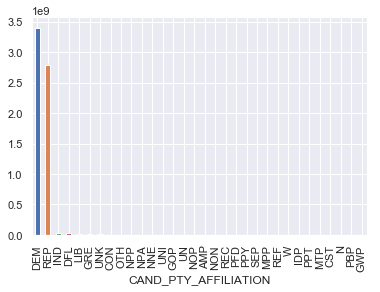

In [342]:
parties = result.groupby('CAND_PTY_AFFILIATION')['AMOUNT'].sum().sort_values(ascending=False)

parties.plot(kind="bar")

In [332]:
result.groupby('YEAR')['AMOUNT'].sum().sort_values(ascending=False)


YEAR
2016    3243304449
2018    3045706507
2017       8168664
2015       7747680
2019         81447
Name: AMOUNT, dtype: int64

In [333]:
result.groupby(['CAND_PTY_AFFILIATION', 'YEAR'])['AMOUNT'].sum().unstack().sort_values(2019).head(10)


YEAR,2015,2016,2017,2018,2019
CAND_PTY_AFFILIATION,,,,,
NPA,NaN,8.563200e+04,29182.0,6.650580e+05,0.0
DEM,2798253.0,1.652760e+09,3173734.0,1.739360e+09,746.0
IND,8846.0,8.456949e+06,19153.0,3.069013e+07,749.0
REP,4880372.0,1.540867e+09,4890247.0,1.243028e+09,79952.0
AMP,NaN,8.216000e+03,NaN,5.064500e+04,NaN
CON,NaN,8.373800e+04,0.0,4.272009e+06,NaN
CST,NaN,1.500000e+01,NaN,NaN,NaN
DFL,NaN,7.524353e+06,14120.0,1.664725e+07,NaN
GOP,NaN,NaN,NaN,2.538000e+05,NaN


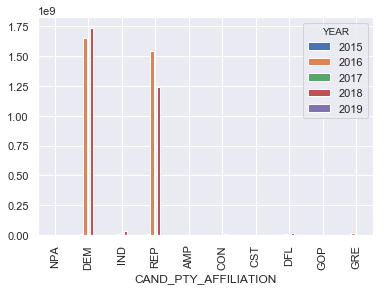

In [28]:
annual_received = result.groupby(['CAND_PTY_AFFILIATION', 'YEAR'])['AMOUNT'].sum().unstack().sort_values(2019).head(10)
annual_received.plot(kind="bar")


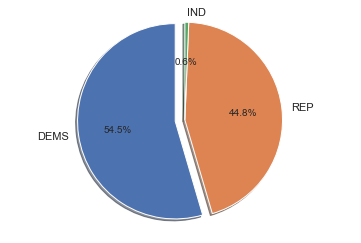

In [29]:
labels = 'DEMS', 'REP', 'IND',
sizes = [3398092185, 2793745636, 39175823]
explode = (0.1, 0.0, 0, )  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

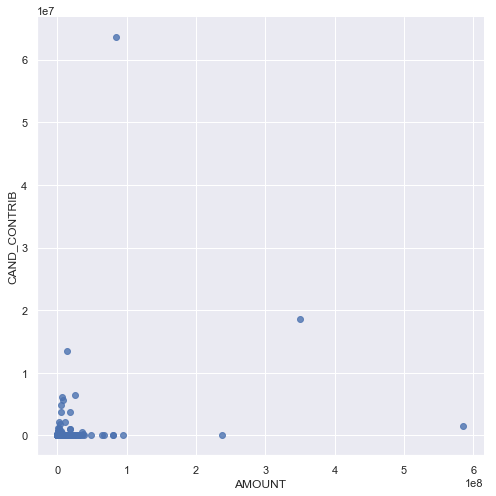

## Thanks and more resources


Thanks for participating in our class today! If you have questions please tweet at me @karriekehoe or send me an email at karrie.anne.kehoe@gmail.com

Here is some Pandas resources I think are great:

* Pandas Cookbook https://github.com/jvns/pandas-cookbook
* Greg Reda's intro to Pandas http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
* Pandas cheat sheet https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* 19 essential snippets in pandas https://jeffdelaney.me/blog/useful-snippets-in-pandas/